In [1]:
#imports
import numpy as np
from simDataPreprocessing import convertToMatrix

In [2]:
#load sequence data as numpy array with convertToMatrix function for every protein concentration
prot1_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot1/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=12678435)
prot1_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot1/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=1, seed=25681)

prot6_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot6/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=71092485)
prot6_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot6/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=6, seed=481276)

prot15_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot15/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=2671)
prot15_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot15/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=15, seed=92178)

prot30_bound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot30/sequences/3.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=28154)
prot30_unbound = convertToMatrix('../../data/simData/singleMIME/normalErrorTest/prot30/sequences/4.txt', maxNumSequences=5000,splitProb=3/450, readSize=100, protConc=30, seed=1823467)

In [3]:
prot1_bound.shape, prot1_unbound.shape, prot6_bound.shape, prot6_unbound.shape, prot15_bound.shape, prot15_unbound.shape, prot30_bound.shape, prot30_unbound.shape

((19941, 451),
 (20215, 451),
 (20065, 451),
 (19975, 451),
 (19990, 451),
 (19908, 451),
 (20141, 451),
 (20087, 451))

In [4]:
#combine all bound and unbound data into one array
bound = np.concatenate((prot1_bound, prot6_bound, prot15_bound, prot30_bound), axis=0)
unbound = np.concatenate((prot1_unbound, prot6_unbound, prot15_unbound, prot30_unbound), axis=0)

#create labels for bound and unbound data
bound_labels = np.ones((bound.shape[0],1))
unbound_labels = np.zeros((unbound.shape[0],1))

#combine bound and unbound data and labels into one array
data = np.concatenate((bound, unbound), axis=0)
labels = np.concatenate((bound_labels, unbound_labels), axis=0)

In [5]:
data.shape, labels.shape

((160322, 451), (160322, 1))

In [6]:
#create training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

In [7]:
#train logistic regression model
#tune hyperparameters with grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

 #tune hyperparameter C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty='l2', solver='sag', max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train.ravel())
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set score: {:.2f}".format(grid.score(X_test, y_test.ravel())))
 

Best cross-validation score: 0.54
Best parameters:  {'C': 10}
Test set score: 0.54


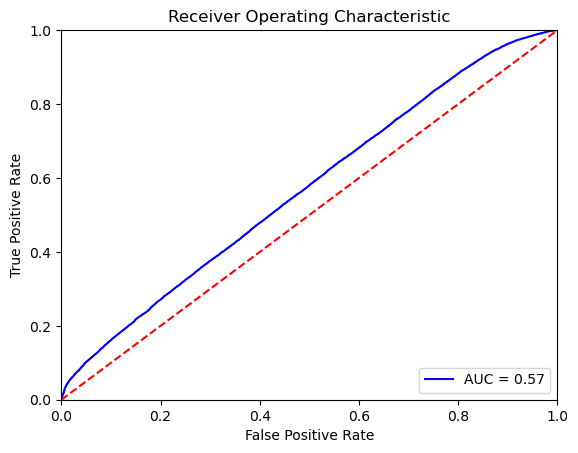

In [8]:
#plot ROC curve for logistic regression model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
# read in kd values
kds = np.loadtxt('../../data/simData/singleMIME/normalErrorTest/prot1/single_kds.txt')
len(kds)

450

/tmp/ipykernel_284/3327109307.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=kds, palette="tab10", linewidth=2.5)


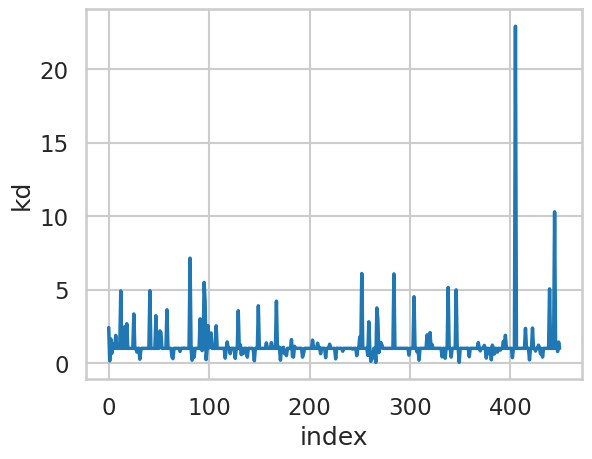

In [10]:
#create line plot of kd values with seaborn
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.lineplot(data=kds, palette="tab10", linewidth=2.5)
plt.ylabel('kd')
plt.xlabel('index')
plt.show()

In [11]:
#get model coefficients
weights = grid.best_estimator_.coef_[0][1:]*-1
len(weights)

450

/tmp/ipykernel_284/1652028196.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=weights, palette="tab10", linewidth=2.5)


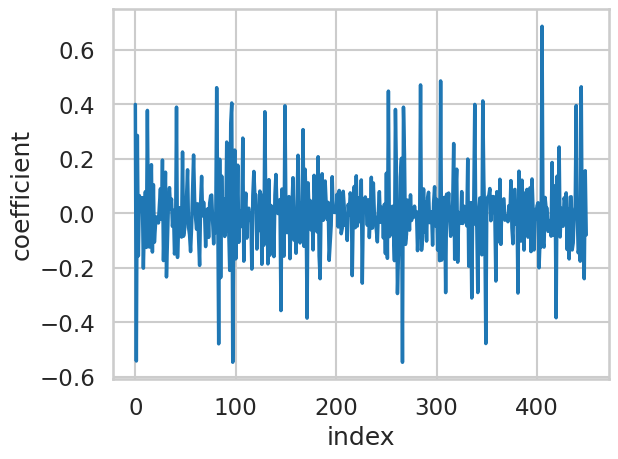

In [29]:
#create line plot of model coefficients with seaborn
sns.set_style("whitegrid")
sns.set_context("talk")
sns.lineplot(data=weights, palette="tab10", linewidth=2.5)
plt.ylabel('coefficient')
plt.xlabel('index')
plt.show()

In [13]:
#get correlation between kd and model coefficients
from scipy.stats import pearsonr
corr, _ = pearsonr(kds, weights)
corr

0.6285818913255763

/tmp/ipykernel_284/590240543.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=kds, y=weights, palette="tab10")


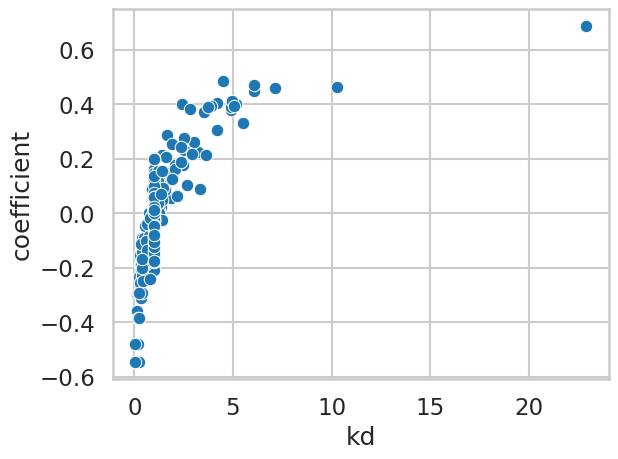

In [30]:
#scatter plot of kd and model coefficients
sns.set_style("whitegrid")
sns.set_context("talk")
sns.scatterplot(x=kds, y=weights, palette="tab10")
plt.ylabel('coefficient')
plt.xlabel('kd')
plt.show()

In [15]:
#get index of kd > 3.5
np.where(kds > 3.5)

(array([ 12,  41,  58,  81,  95,  96, 129, 149, 167, 252, 267, 284, 304,
        338, 346, 405, 439, 444]),)

In [16]:
#get index of weights > 0.3
np.where(weights > 0.3)

(array([  0,  12,  41,  81,  95,  96, 129, 149, 167, 252, 259, 267, 284,
        304, 338, 346, 405, 439, 444]),)

In [17]:
#check overlap between kds > 4 and weights > 0.3
np.intersect1d(np.where(kds > 3.5), np.where(weights > 0.3))

array([ 12,  41,  81,  95,  96, 129, 149, 167, 252, 267, 284, 304, 338,
       346, 405, 439, 444])

In [18]:
#for every residue calculate concentration needed for a binding probability of 0.5
concs = []
testSeq = np.zeros(451)-1
for i in range(451):
    testSeq[i] = 1
    #calculate concentration needed to bind to 50% of the time
    from scipy.optimize import fsolve
    def func(x):
        testSeq[0] = x
        return grid.predict_proba(testSeq.reshape(1,-1))[0][1] - 0.5

    x = fsolve(func, 1)

    concs.append(x[0]*-1)
len(concs)

451

/tmp/ipykernel_284/2572663862.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=concs, palette="tab10", linewidth=2.5)


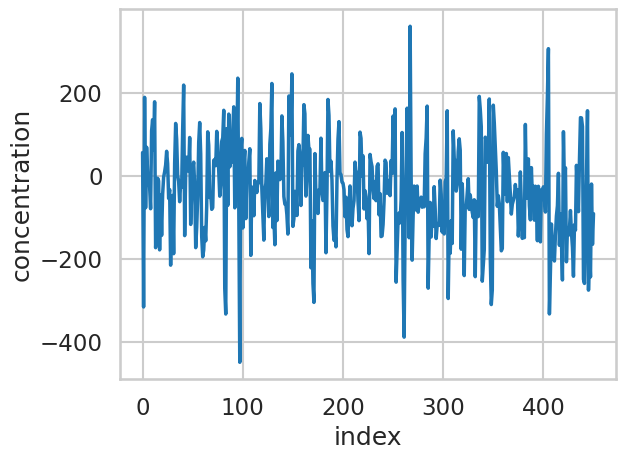

In [19]:
#lineplot of concentrations needed for a binding probability of 0.5
concs = np.array(concs)
sns.set_style("whitegrid")
sns.set_context("talk")
sns.lineplot(data=concs, palette="tab10", linewidth=2.5)
plt.ylabel('concentration')
plt.xlabel('index')
plt.show()

/tmp/ipykernel_284/1599640741.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=kds, palette="tab10", linewidth=2.5)


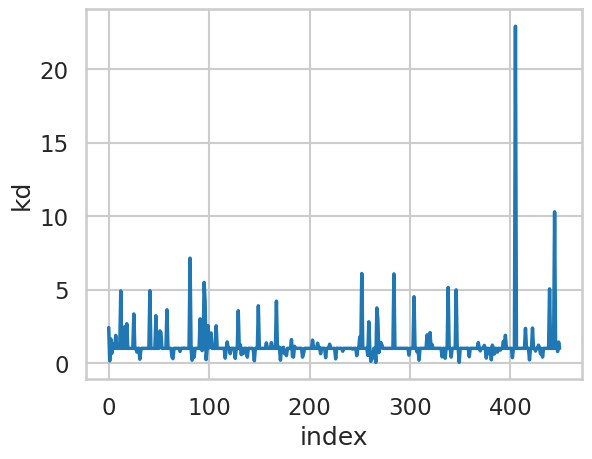

(array([ 12,  41,  58,  81,  95,  96, 129, 149, 167, 252, 267, 284, 304,
        338, 346, 405, 439, 444]),)

In [20]:
#create line plot of kd values with seaborn
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
sns.lineplot(data=kds, palette="tab10", linewidth=2.5)
plt.ylabel('kd')
plt.xlabel('index')
plt.show()

#get index of kd > 3.5
np.where(kds > 3.5)

In [21]:
np.where(concs > 200)

(array([ 41,  95, 129, 149, 267, 405]),)

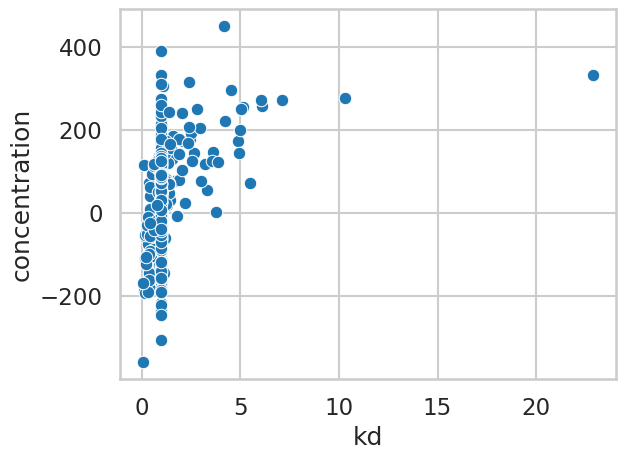

In [31]:
#scatter plot of kd annd concentrations needed for a binding probability of 0.5
sns.set_style("whitegrid")
sns.set_context("talk")
sns.scatterplot(x=kds, y=concs[1:451]*-1)
plt.ylabel('concentration')
plt.xlabel('kd')
plt.show()